In [ ]:
!nvidia-smi

Wed Apr 14 08:14:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!unzip dl_vision.zip

Archive:  dl_vision.zip
   creating: dl_vision/
   creating: dl_vision/.idea/
 extracting: dl_vision/.idea/.gitignore  
  inflating: dl_vision/.idea/dl_vision.iml  
   creating: dl_vision/.idea/inspectionProfiles/
  inflating: dl_vision/.idea/inspectionProfiles/profiles_settings.xml  
  inflating: dl_vision/.idea/misc.xml  
  inflating: dl_vision/.idea/modules.xml  
  inflating: dl_vision/.idea/vcs.xml  
  inflating: dl_vision/.idea/workspace.xml  
   creating: dl_vision/base/
  inflating: dl_vision/base/base_model.py  
  inflating: dl_vision/base/base_trainer.py  
 extracting: dl_vision/base/__init__.py  
   creating: dl_vision/base/__pycache__/
  inflating: dl_vision/base/__pycache__/base_model.cpython-38.pyc  
  inflating: dl_vision/base/__pycache__/base_trainer.cpython-38.pyc  
  inflating: dl_vision/base/__pycache__/__init__.cpython-38.pyc  
  inflating: dl_vision/config.yml    
   creating: dl_vision/data/
   creating: dl_vision/data_loader/
  inflating: dl_vision/data_loader/aug

In [ ]:
%cd dl_vision/

/content/dl_vision


In [ ]:
!cat /content/dl_vision/config.yml

name: CIFAR10
save_dir: saved/
seed: 9
target_device: cuda

arch:
  type: CIFAR10_ResNet_Custom
  args: {}

transforms:
  type: CIFAR10Albumentations
  args: {}

data_loader:
  type: CIFAR10DataLoader
  args:
    batch_size: 128
    data_dir: data/
    num_workers: 4
    shuffle: True

criterion: cross_entropy_loss

lr_finder:
  epochs: 50

lr_scheduler:
  max_lr_at_epoch: 5
  type: OneCycleLR
  args:
    max_lr: 0.1

optimizer:
  type: SGD
  args:
    lr: 0.001
    momentum: 0.95
    weight_decay: 0.0005

training:
  epochs: 24



In [ ]:
# !python run.py --config=config.yml

import runner.runner as runners
from utils.config import load_config

config = load_config('config.yml')
# create a runner
runner = runners.Runner(config,custom_model=True)

In [ ]:
# # setup train parameters
runner.setup_train()

[ 2021-04-14 08:14:48,921 -dl_vision - runner.runner ] INFO: Training Configuration
[ 2021-04-14 08:14:48,937 -dl_vision - runner.runner ] INFO: {'arch': {'args': {}, 'type': 'CIFAR10_ResNet_Custom'},
[ 2021-04-14 08:14:48,938 -dl_vision - runner.runner ] INFO:  'criterion': 'cross_entropy_loss',
[ 2021-04-14 08:14:48,939 -dl_vision - runner.runner ] INFO:  'data_loader': {'args': {'batch_size': 128,
[ 2021-04-14 08:14:48,947 -dl_vision - runner.runner ] INFO:                           'data_dir': 'data/',
[ 2021-04-14 08:14:48,951 -dl_vision - runner.runner ] INFO:                           'num_workers': 4,
[ 2021-04-14 08:14:48,952 -dl_vision - runner.runner ] INFO:                           'shuffle': True},
[ 2021-04-14 08:14:48,955 -dl_vision - runner.runner ] INFO:                  'type': 'CIFAR10DataLoader'},
[ 2021-04-14 08:14:48,957 -dl_vision - runner.runner ] INFO:  'lr_finder': {'epochs': 50},
[ 2021-04-14 08:14:48,961 -dl_vision - runner.runner ] INFO:  'lr_scheduler': {


Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified
OneCycleLR
[ 2021-04-14 08:15:08,485 -dl_vision - runner.runner ] INFO: Building: torch.optim.lr_scheduler.OneCycleLR
[ 2021-04-14 08:15:08,486 -dl_vision - runner.runner ] INFO: Intializing the Trainer


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


# Model Summary 

In [ ]:
# print model summary
runner.model_summary(input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
            Conv2d-7          [-1, 128, 16, 16]         147,456
       BatchNorm2d-8          [-1, 128, 16, 16]             256
            Conv2d-9          [-1, 128, 16, 16]         147,456
      BatchNorm2d-10          [-1, 128, 16, 16]             256
         ResBlock-11          [-1, 128, 16, 16]               0
       LayerBlock-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         294,912
        MaxPool2d-14            [-1, 25

[ 2021-04-14 08:15:08,637 -dl_vision - runner.runner ] INFO: Finding best Learning Rate.
custom_model
[ 2021-04-14 08:15:08,641 -dl_vision - utils.config ] INFO: Building: model.custom_model.CIFAR10_ResNet_Custom
[ 2021-04-14 08:15:08,717 -dl_vision - utils.config ] INFO: Building: torch.optim.SGD


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



Learning rate search finished. See the graph with {finder_name}.plot()
[ 2021-04-14 08:30:37,729 -dl_vision - runner.runner ] INFO: sorted lrs: [0.21527019498607244, 0.21552317042289185, 0.22032970372246138, 0.2157761458597113, 0.21501721954925299, 0.22134160546973916, 0.19629703722461384, 0.20160952139782223, 0.21602912129653076, 0.2210886300329197]
[ 2021-04-14 08:30:37,731 -dl_vision - runner.runner ] INFO: best lr: 0.21527019498607244
[ 2021-04-14 08:30:37,738 -dl_vision - runner.runner ] INFO: plotting lr_finder
LR suggestion: steepest gradient
Suggested LR: 1.74E-02


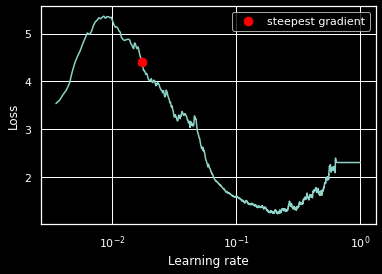

In [ ]:
# Find LR
runner.find_lr()

In [ ]:
# Training the model
# _ = runner.trainer.train()
runner.train_lr(use_best_lr=True)

[ 2021-04-14 08:33:10,505 -dl_vision - runner.runner ] INFO: Using max_lr: 0.21527019498607244
[ 2021-04-14 08:33:10,510 -dl_vision - runner.runner ] INFO: Using min_lr: 0.007175673166202415
[ 2021-04-14 08:33:10,514 -dl_vision - runner.runner ] INFO: Using initial_lr: 0.010763509749303622
[ 2021-04-14 08:33:10,516 -dl_vision - base.base_trainer ] INFO: Starting the Training.
[ 2021-04-14 08:33:10,517 -dl_vision - base.base_trainer ] INFO: Training the model for 24 epochs.
[ 2021-04-14 08:33:10,519 -dl_vision - base.base_trainer ] INFO: Training Epoch: 0.
[ 2021-04-14 08:33:10,521 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.021527019498607244


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



[ 2021-04-14 08:34:42,597 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 0, Average Loss 3.87990, Accuracy: 17.588%  (0.17588)
[ 2021-04-14 08:34:42,602 -dl_vision - base.base_trainer ] INFO: Test Epoch: 0.
[ 2021-04-14 08:34:46,260 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 0, Average Loss 2.17823, Accuracy: 27.39%  (0.2739)
[ 2021-04-14 08:34:46,262 -dl_vision - base.base_trainer ] INFO: Training Epoch: 1.
[ 2021-04-14 08:34:46,267 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.030311491158422327



[ 2021-04-14 08:36:18,166 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 1, Average Loss 1.82876, Accuracy: 36.282%  (0.36282)
[ 2021-04-14 08:36:18,172 -dl_vision - base.base_trainer ] INFO: Test Epoch: 1.
[ 2021-04-14 08:36:21,887 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 1, Average Loss 1.50599, Accuracy: 43.51%  (0.4351)
[ 2021-04-14 08:36:21,890 -dl_vision - base.base_trainer ] INFO: Training Epoch: 2.
[ 2021-04-14 08:36:21,891 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.08148137991949678



[ 2021-04-14 08:37:54,041 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 2, Average Loss 1.37260, Accuracy: 50.476%  (0.50476)
[ 2021-04-14 08:37:54,049 -dl_vision - base.base_trainer ] INFO: Test Epoch: 2.
[ 2021-04-14 08:37:57,724 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 2, Average Loss 1.19523, Accuracy: 57.43%  (0.5743)
[ 2021-04-14 08:37:57,726 -dl_vision - base.base_trainer ] INFO: Training Epoch: 3.
[ 2021-04-14 08:37:57,731 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.14470867068542625



[ 2021-04-14 08:39:30,008 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 3, Average Loss 1.07840, Accuracy: 61.776%  (0.61776)
[ 2021-04-14 08:39:30,016 -dl_vision - base.base_trainer ] INFO: Test Epoch: 3.
[ 2021-04-14 08:39:33,697 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 3, Average Loss 1.01073, Accuracy: 64.84%  (0.6484)
[ 2021-04-14 08:39:33,699 -dl_vision - base.base_trainer ] INFO: Training Epoch: 4.
[ 2021-04-14 08:39:33,703 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.19581878152485951



[ 2021-04-14 08:41:05,828 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 4, Average Loss 0.91317, Accuracy: 67.934%  (0.67934)
[ 2021-04-14 08:41:05,832 -dl_vision - base.base_trainer ] INFO: Test Epoch: 4.
[ 2021-04-14 08:41:09,484 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 4, Average Loss 1.79205, Accuracy: 52.65%  (0.5265)
[ 2021-04-14 08:41:09,487 -dl_vision - base.base_trainer ] INFO: Training Epoch: 5.
[ 2021-04-14 08:41:09,497 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.2152701856827156



[ 2021-04-14 08:42:41,512 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 5, Average Loss 0.82124, Accuracy: 71.722%  (0.71722)
[ 2021-04-14 08:42:41,520 -dl_vision - base.base_trainer ] INFO: Test Epoch: 5.
[ 2021-04-14 08:42:45,177 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 5, Average Loss 0.77791, Accuracy: 74.1%  (0.741)
[ 2021-04-14 08:42:45,186 -dl_vision - base.base_trainer ] INFO: Training Epoch: 6.
[ 2021-04-14 08:42:45,187 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.21384387466637955



[ 2021-04-14 08:44:17,001 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 6, Average Loss 0.76647, Accuracy: 73.512%  (0.73512)
[ 2021-04-14 08:44:17,008 -dl_vision - base.base_trainer ] INFO: Test Epoch: 6.
[ 2021-04-14 08:44:20,620 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 6, Average Loss 1.02222, Accuracy: 68.68%  (0.6868)
[ 2021-04-14 08:44:20,622 -dl_vision - base.base_trainer ] INFO: Training Epoch: 7.
[ 2021-04-14 08:44:20,627 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.20961833190356835



[ 2021-04-14 08:45:52,918 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 7, Average Loss 0.73684, Accuracy: 74.556%  (0.74556)
[ 2021-04-14 08:45:52,925 -dl_vision - base.base_trainer ] INFO: Test Epoch: 7.
[ 2021-04-14 08:45:56,540 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 7, Average Loss 1.16267, Accuracy: 68.43%  (0.6843)
[ 2021-04-14 08:45:56,542 -dl_vision - base.base_trainer ] INFO: Training Epoch: 8.
[ 2021-04-14 08:45:56,544 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.20270881918568362



[ 2021-04-14 08:47:28,949 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 8, Average Loss 0.69058, Accuracy: 76.012%  (0.76012)
[ 2021-04-14 08:47:28,951 -dl_vision - base.base_trainer ] INFO: Test Epoch: 8.
[ 2021-04-14 08:47:32,620 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 8, Average Loss 1.18649, Accuracy: 65.29%  (0.6529)
[ 2021-04-14 08:47:32,622 -dl_vision - base.base_trainer ] INFO: Training Epoch: 9.
[ 2021-04-14 08:47:32,624 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.1933038100079139



[ 2021-04-14 08:49:04,568 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 9, Average Loss 0.67518, Accuracy: 76.538%  (0.76538)
[ 2021-04-14 08:49:04,575 -dl_vision - base.base_trainer ] INFO: Test Epoch: 9.
[ 2021-04-14 08:49:08,196 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 9, Average Loss 0.82199, Accuracy: 73.48%  (0.7348)
[ 2021-04-14 08:49:08,198 -dl_vision - base.base_trainer ] INFO: Training Epoch: 10.
[ 2021-04-14 08:49:08,200 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.18165984850359956



[ 2021-04-14 08:50:40,390 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 10, Average Loss 0.63948, Accuracy: 78.068%  (0.78068)
[ 2021-04-14 08:50:40,396 -dl_vision - base.base_trainer ] INFO: Test Epoch: 10.
[ 2021-04-14 08:50:44,052 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 10, Average Loss 0.64742, Accuracy: 78.86%  (0.7886)
[ 2021-04-14 08:50:44,054 -dl_vision - base.base_trainer ] INFO: Training Epoch: 11.
[ 2021-04-14 08:50:44,056 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.16809455158903616



[ 2021-04-14 08:52:16,188 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 11, Average Loss 0.61320, Accuracy: 78.766%  (0.78766)
[ 2021-04-14 08:52:16,198 -dl_vision - base.base_trainer ] INFO: Test Epoch: 11.
[ 2021-04-14 08:52:19,820 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 11, Average Loss 0.65559, Accuracy: 79.02%  (0.7902)
[ 2021-04-14 08:52:19,821 -dl_vision - base.base_trainer ] INFO: Training Epoch: 12.
[ 2021-04-14 08:52:19,823 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.15297794520196306



[ 2021-04-14 08:53:51,767 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 12, Average Loss 0.58823, Accuracy: 79.852%  (0.79852)
[ 2021-04-14 08:53:51,768 -dl_vision - base.base_trainer ] INFO: Test Epoch: 12.
[ 2021-04-14 08:53:55,458 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 12, Average Loss 0.97042, Accuracy: 71.98%  (0.7198)
[ 2021-04-14 08:53:55,460 -dl_vision - base.base_trainer ] INFO: Training Epoch: 13.
[ 2021-04-14 08:53:55,461 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.13672237095856773



[ 2021-04-14 08:55:27,636 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 13, Average Loss 0.57865, Accuracy: 80.114%  (0.80114)
[ 2021-04-14 08:55:27,642 -dl_vision - base.base_trainer ] INFO: Test Epoch: 13.
[ 2021-04-14 08:55:31,282 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 13, Average Loss 0.66011, Accuracy: 79.01%  (0.7901)
[ 2021-04-14 08:55:31,284 -dl_vision - base.base_trainer ] INFO: Training Epoch: 14.
[ 2021-04-14 08:55:31,288 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.11977123854909068



[ 2021-04-14 08:57:03,758 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 14, Average Loss 0.55040, Accuracy: 81.084%  (0.81084)
[ 2021-04-14 08:57:03,768 -dl_vision - base.base_trainer ] INFO: Test Epoch: 14.
[ 2021-04-14 08:57:07,426 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 14, Average Loss 0.54816, Accuracy: 81.31%  (0.8131)
[ 2021-04-14 08:57:07,428 -dl_vision - base.base_trainer ] INFO: Training Epoch: 15.
[ 2021-04-14 08:57:07,434 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.10258693067735807



[ 2021-04-14 08:58:39,538 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 15, Average Loss 0.51596, Accuracy: 82.206%  (0.82206)
[ 2021-04-14 08:58:39,543 -dl_vision - base.base_trainer ] INFO: Test Epoch: 15.
[ 2021-04-14 08:58:43,196 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 15, Average Loss 0.52895, Accuracy: 81.71%  (0.8171)
[ 2021-04-14 08:58:43,198 -dl_vision - base.base_trainer ] INFO: Training Epoch: 16.
[ 2021-04-14 08:58:43,200 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.08563819046596345



[ 2021-04-14 09:00:15,364 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 16, Average Loss 0.48581, Accuracy: 83.064%  (0.83064)
[ 2021-04-14 09:00:15,371 -dl_vision - base.base_trainer ] INFO: Test Epoch: 16.
[ 2021-04-14 09:00:19,016 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 16, Average Loss 0.48445, Accuracy: 83.68%  (0.8368)
[ 2021-04-14 09:00:19,018 -dl_vision - base.base_trainer ] INFO: Training Epoch: 17.
[ 2021-04-14 09:00:19,019 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.06938733536580546



[ 2021-04-14 09:01:51,055 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 17, Average Loss 0.46640, Accuracy: 83.878%  (0.83878)
[ 2021-04-14 09:01:51,056 -dl_vision - base.base_trainer ] INFO: Test Epoch: 17.
[ 2021-04-14 09:01:54,662 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 17, Average Loss 0.44687, Accuracy: 85.03%  (0.8503)
[ 2021-04-14 09:01:54,663 -dl_vision - base.base_trainer ] INFO: Training Epoch: 18.
[ 2021-04-14 09:01:54,665 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.05427764634119884



[ 2021-04-14 09:03:26,578 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 18, Average Loss 0.41084, Accuracy: 85.816%  (0.85816)
[ 2021-04-14 09:03:26,580 -dl_vision - base.base_trainer ] INFO: Test Epoch: 18.
[ 2021-04-14 09:03:30,253 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 18, Average Loss 0.42912, Accuracy: 85.41%  (0.8541)
[ 2021-04-14 09:03:30,255 -dl_vision - base.base_trainer ] INFO: Training Epoch: 19.
[ 2021-04-14 09:03:30,257 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.040721276320715205



[ 2021-04-14 09:05:01,971 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 19, Average Loss 0.36896, Accuracy: 87.19%  (0.8719)
[ 2021-04-14 09:05:01,978 -dl_vision - base.base_trainer ] INFO: Test Epoch: 19.
[ 2021-04-14 09:05:05,596 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 19, Average Loss 0.36474, Accuracy: 87.62%  (0.8762)
[ 2021-04-14 09:05:05,598 -dl_vision - base.base_trainer ] INFO: Training Epoch: 20.
[ 2021-04-14 09:05:05,604 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.029088007739694187



[ 2021-04-14 09:06:37,535 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 20, Average Loss 0.32247, Accuracy: 88.822%  (0.88822)
[ 2021-04-14 09:06:37,541 -dl_vision - base.base_trainer ] INFO: Test Epoch: 20.
[ 2021-04-14 09:06:41,215 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 20, Average Loss 0.35963, Accuracy: 88.23%  (0.8823)
[ 2021-04-14 09:06:41,217 -dl_vision - base.base_trainer ] INFO: Training Epoch: 21.
[ 2021-04-14 09:06:41,219 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.019695165839358174



[ 2021-04-14 09:08:13,282 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 21, Average Loss 0.26650, Accuracy: 90.716%  (0.90716)
[ 2021-04-14 09:08:13,284 -dl_vision - base.base_trainer ] INFO: Test Epoch: 21.
[ 2021-04-14 09:08:16,984 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 21, Average Loss 0.31120, Accuracy: 89.54%  (0.8954)
[ 2021-04-14 09:08:16,987 -dl_vision - base.base_trainer ] INFO: Training Epoch: 22.
[ 2021-04-14 09:08:16,991 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.012798962861436905



[ 2021-04-14 09:09:48,917 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 22, Average Loss 0.22966, Accuracy: 91.964%  (0.91964)
[ 2021-04-14 09:09:48,922 -dl_vision - base.base_trainer ] INFO: Test Epoch: 22.
[ 2021-04-14 09:09:52,517 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 22, Average Loss 0.28933, Accuracy: 90.59%  (0.9059)
[ 2021-04-14 09:09:52,518 -dl_vision - base.base_trainer ] INFO: Training Epoch: 23.
[ 2021-04-14 09:09:52,520 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.008587509246108616



[ 2021-04-14 09:11:24,235 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 23, Average Loss 0.19689, Accuracy: 93.288%  (0.93288)
[ 2021-04-14 09:11:24,247 -dl_vision - base.base_trainer ] INFO: Test Epoch: 23.
[ 2021-04-14 09:11:27,844 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 23, Average Loss 0.27673, Accuracy: 90.76%  (0.9076)
[ 2021-04-14 09:11:27,846 -dl_vision - runner.runner ] INFO: Finished.


# Plots

[ 2021-04-14 09:11:27,872 -dl_vision - runner.runner ] INFO: Plotting the Metrics.


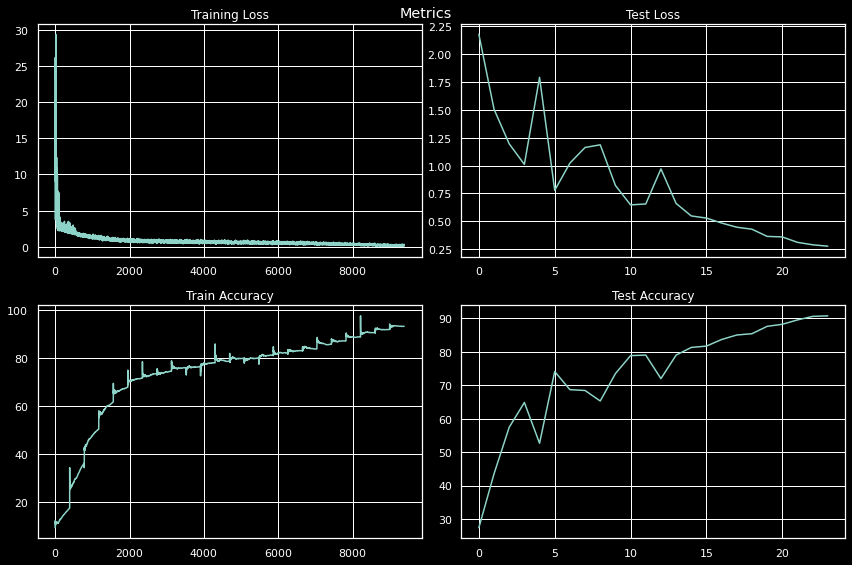

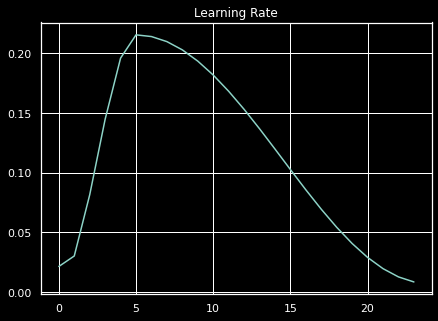

In [ ]:
# plot the metrics
plt=runner.plot_metrics()

In [ ]:
target_layers = ["layer1", "layer2", "layer3"]

[ 2021-04-14 09:16:34,279 -dl_vision - runner.runner ] INFO: Plotting GradCAM.


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[ 2021-04-14 09:16:34,588 -dl_vision - runner.runner ] INFO: Plotting for 5 Samples.
[ 2021-04-14 09:16:34,633 -dl_vision - utils.grad_cam ] INFO: generating Grad-CAM for layer1
[ 2021-04-14 09:16:34,651 -dl_vision - utils.grad_cam ] INFO: generating Grad-CAM for layer2
[ 2021-04-14 09:16:34,656 -dl_vision - utils.grad_cam ] INFO: generating Grad-CAM for layer3


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


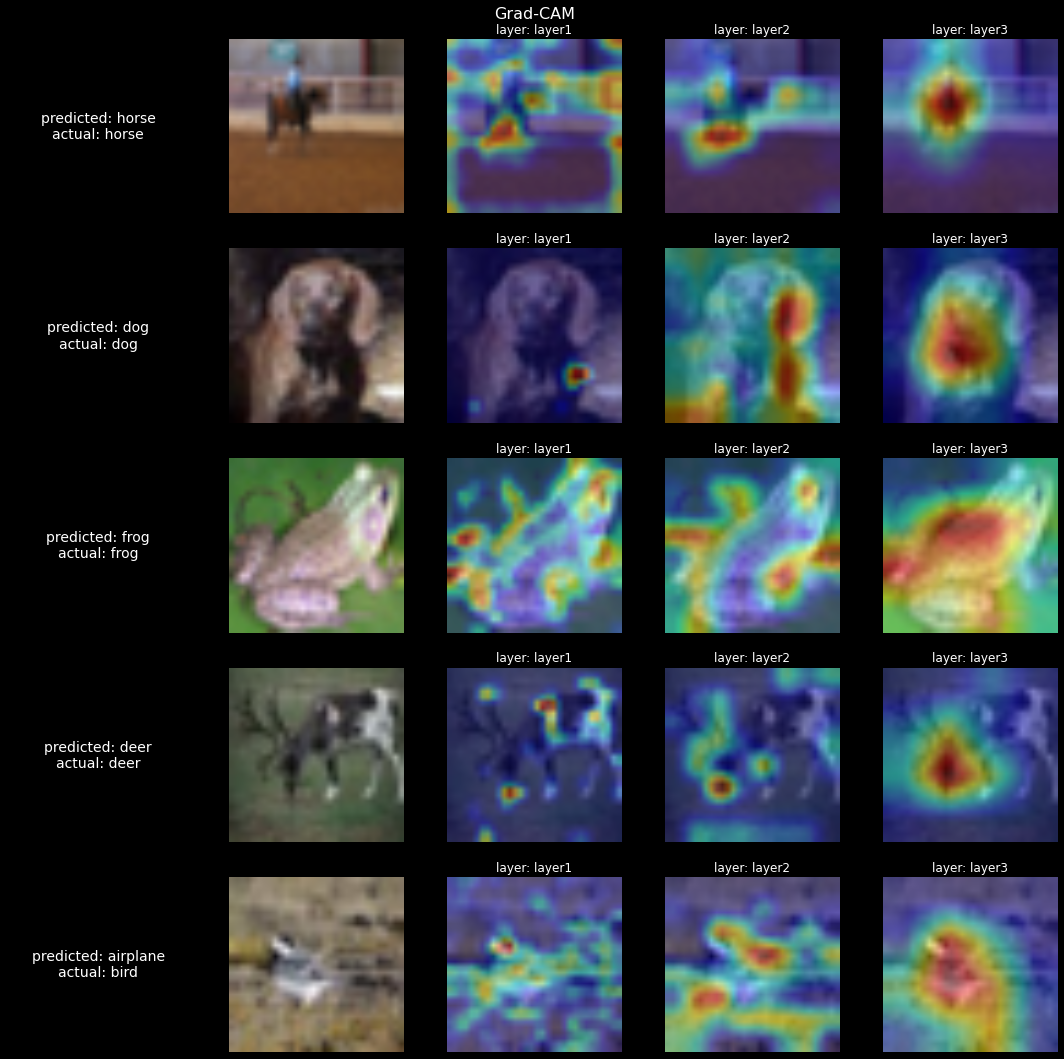

In [ ]:
runner.plot_gradcam(target_layers=target_layers)

[ 2021-04-14 09:16:40,637 -dl_vision - runner.runner ] INFO: Model Misclassified Images.


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[ 2021-04-14 09:16:44,548 -dl_vision - runner.runner ] INFO: Selecting 25 misclassified Samples.
[ 2021-04-14 09:16:44,565 -dl_vision - utils.grad_cam ] INFO: generating Grad-CAM for layer1
[ 2021-04-14 09:16:44,569 -dl_vision - utils.grad_cam ] INFO: generating Grad-CAM for layer2
[ 2021-04-14 09:16:44,573 -dl_vision - utils.grad_cam ] INFO: generating Grad-CAM for layer3


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


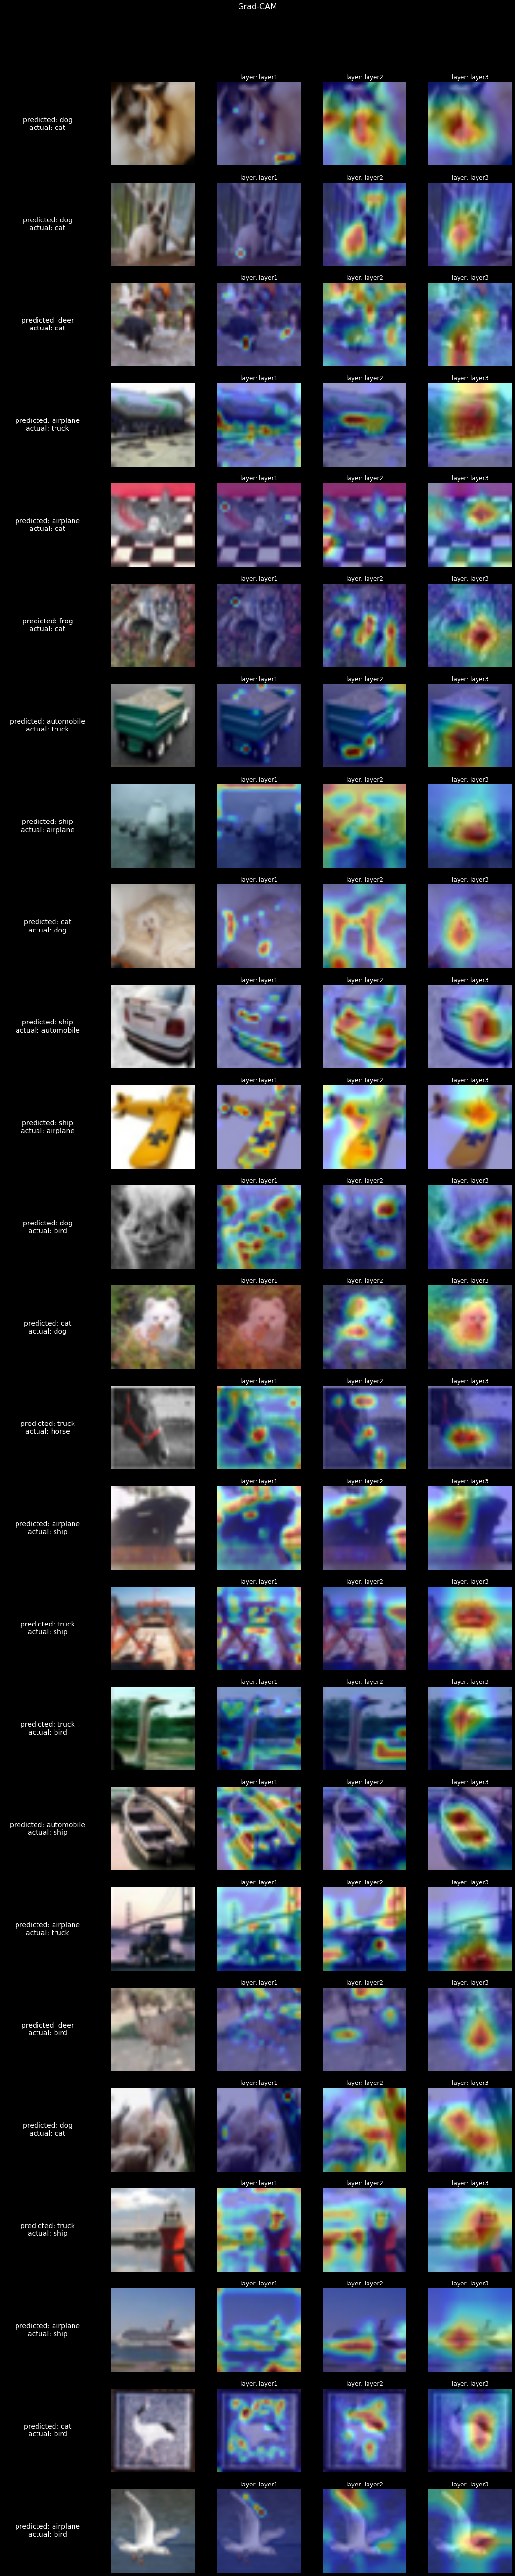

In [ ]:
runner.plot_misclassified(target_layers=target_layers)